
Processing WETH:
Number of deposits: 1627
Average deposit amount: 4.17 WETH
Average price: $3078.53


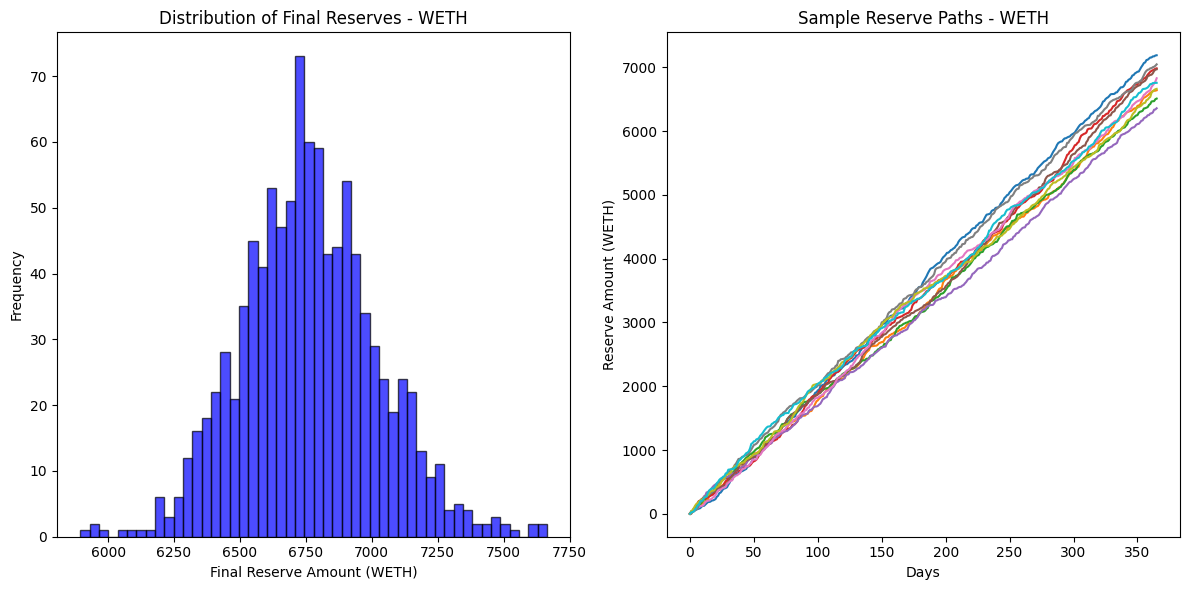

Initial reserve: 0.00 WETH
Mean final reserve: 6764.08 WETH
Median final reserve: 6751.99 WETH
5th percentile reserve: 6353.29 WETH
95th percentile reserve: 7200.64 WETH

USD Values (based on average price of $3078.53):
Initial reserve: $0.00
Mean final reserve: $20823390.28
Median final reserve: $20786181.90
5th percentile reserve: $19558761.86
95th percentile reserve: $22167356.96

Processing WBTC:
Number of deposits: 131
Average deposit amount: 1.44 WBTC
Average price: $42131.02


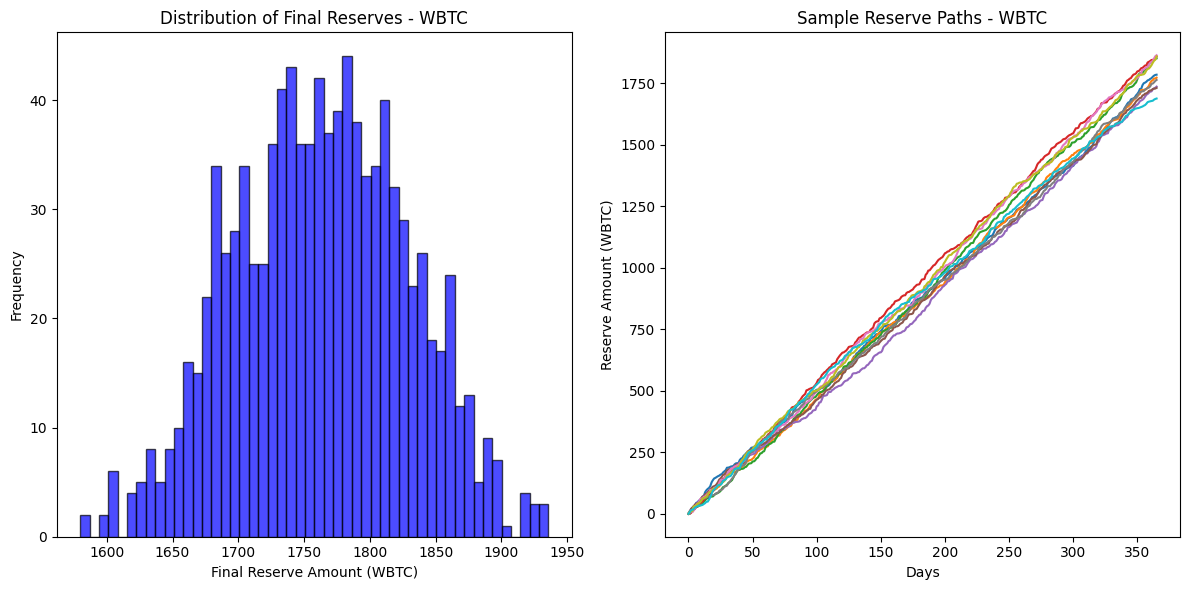

Initial reserve: 0.00 WBTC
Mean final reserve: 1762.88 WBTC
Median final reserve: 1763.25 WBTC
5th percentile reserve: 1658.19 WBTC
95th percentile reserve: 1867.61 WBTC

USD Values (based on average price of $42131.02):
Initial reserve: $0.00
Mean final reserve: $74271842.17
Median final reserve: $74287433.93
5th percentile reserve: $69861388.24
95th percentile reserve: $78684403.71

Processing USDC:
Number of deposits: 897
Average deposit amount: 21292.11 USDC
Average price: $1.00


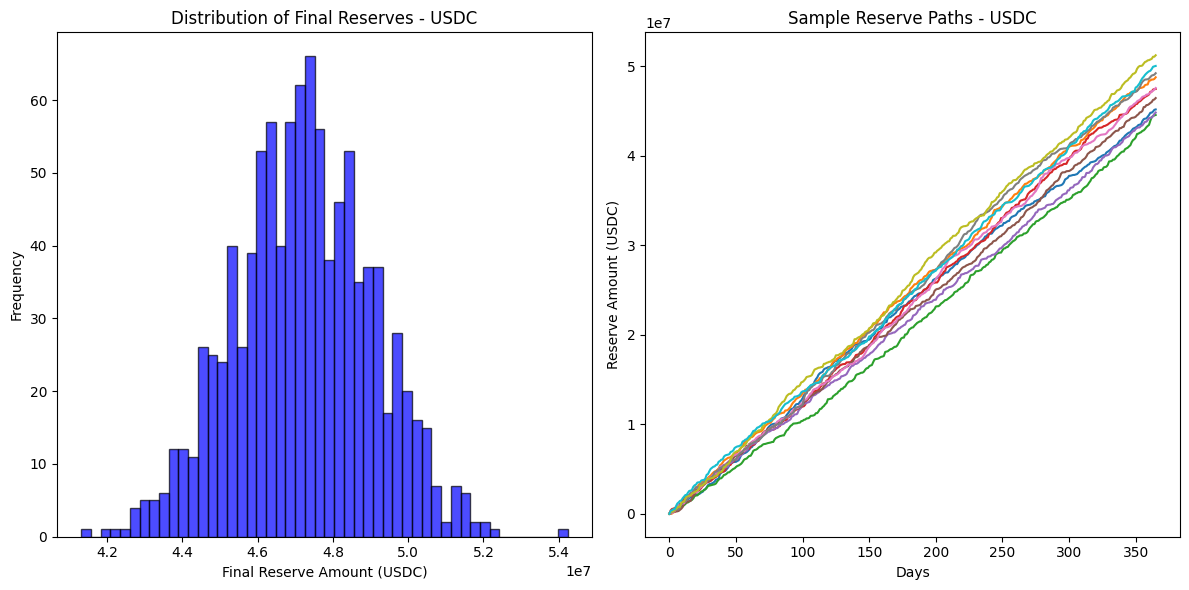

Initial reserve: 0.00 USDC
Mean final reserve: 47223882.71 USDC
Median final reserve: 47235317.71 USDC
5th percentile reserve: 44198508.74 USDC
95th percentile reserve: 50197670.07 USDC

USD Values (based on average price of $1.00):
Initial reserve: $0.00
Mean final reserve: $47222583.98
Median final reserve: $47234018.66
5th percentile reserve: $44197293.21
95th percentile reserve: $50196289.55

Processing LINK:
Number of deposits: 60
Average deposit amount: 606.83 LINK
Average price: $14.93


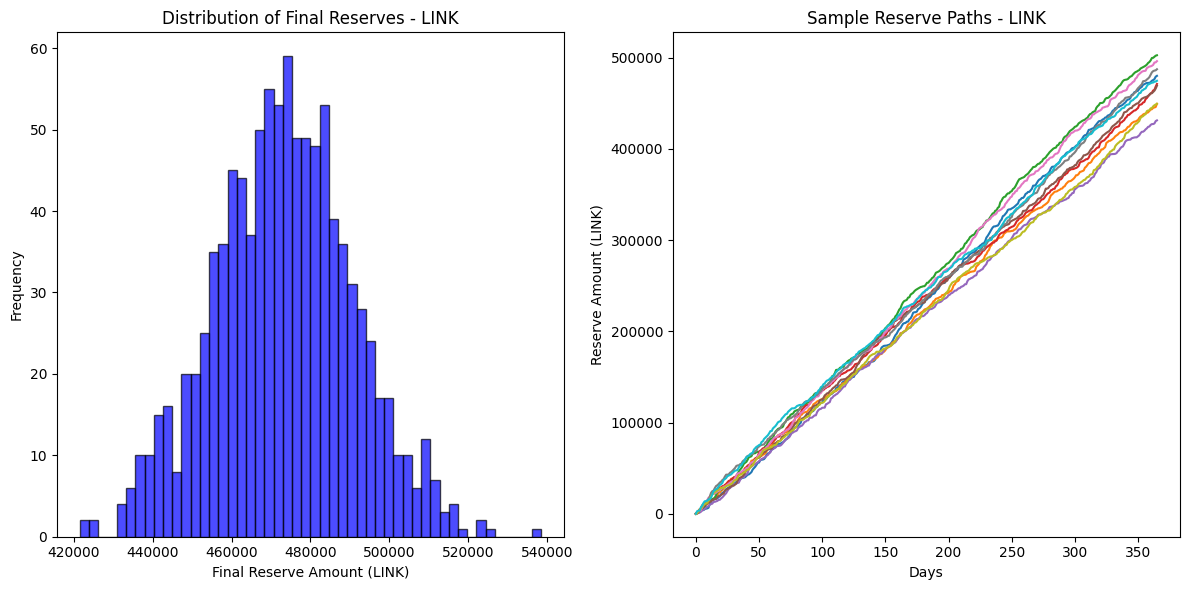

Initial reserve: 0.00 LINK
Mean final reserve: 473216.40 LINK
Median final reserve: 473359.48 LINK
5th percentile reserve: 442912.84 LINK
95th percentile reserve: 502970.69 LINK

USD Values (based on average price of $14.93):
Initial reserve: $0.00
Mean final reserve: $7063852.17
Median final reserve: $7065988.04
5th percentile reserve: $6611501.34
95th percentile reserve: $7508003.94

Processing USDT:
Number of deposits: 276
Average deposit amount: 5106.17 USDT
Average price: $1.00


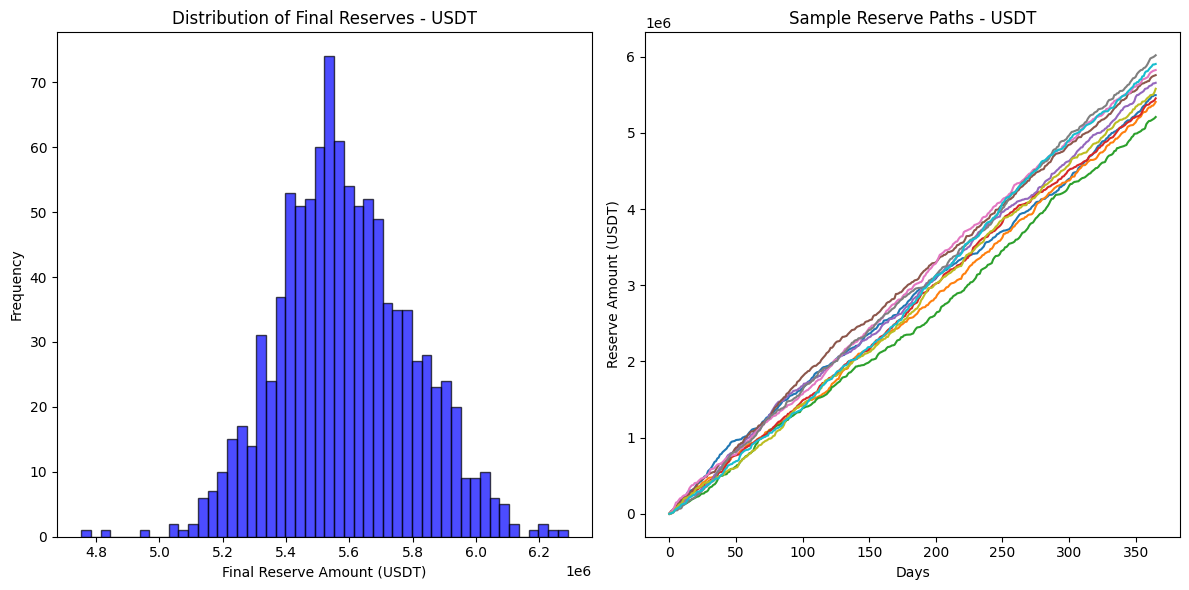

Initial reserve: 0.00 USDT
Mean final reserve: 5588975.77 USDT
Median final reserve: 5574495.39 USDT
5th percentile reserve: 5255126.21 USDT
95th percentile reserve: 5940297.01 USDT

USD Values (based on average price of $1.00):
Initial reserve: $0.00
Mean final reserve: $5590979.28
Median final reserve: $5576493.71
5th percentile reserve: $5257010.03
95th percentile reserve: $5942426.45

Processing DAI:
Number of deposits: 119
Average deposit amount: 10429.23 DAI
Average price: $1.00


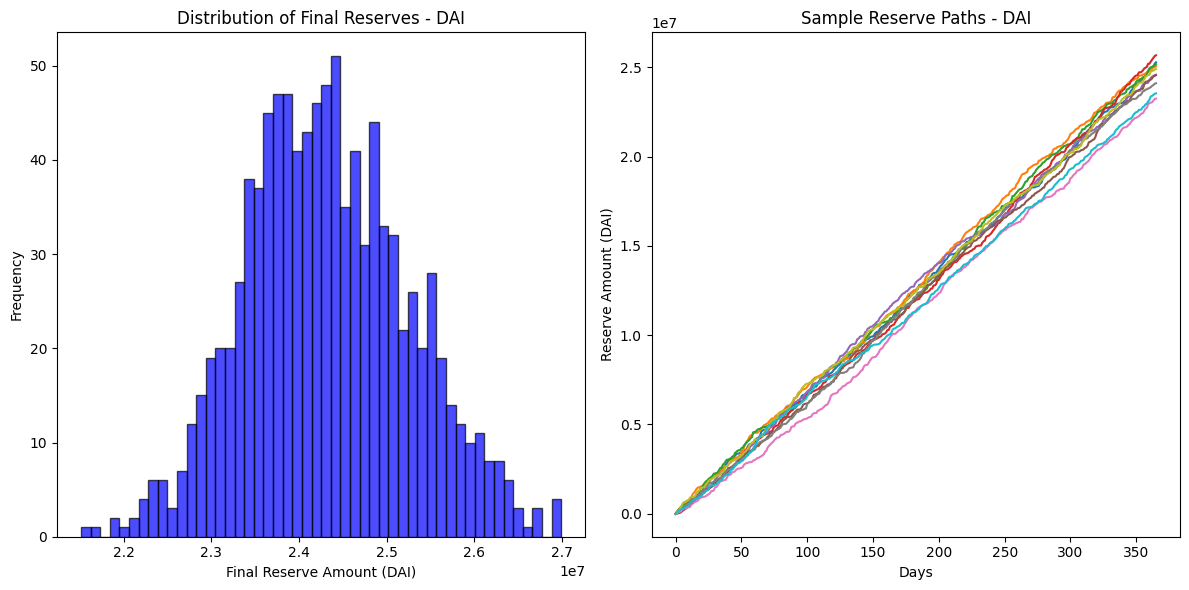

Initial reserve: 0.00 DAI
Mean final reserve: 24319419.16 DAI
Median final reserve: 24266544.59 DAI
5th percentile reserve: 22886643.63 DAI
95th percentile reserve: 25930290.68 DAI

USD Values (based on average price of $1.00):
Initial reserve: $0.00
Mean final reserve: $24326367.94
Median final reserve: $24273478.27
5th percentile reserve: $22893183.02
95th percentile reserve: $25937699.74

Processing AAVE:
Number of deposits: 1
Average deposit amount: 69.44 AAVE
Average price: $140.28
Not enough variation in deposits for AAVE. Skipping Monte Carlo simulation.


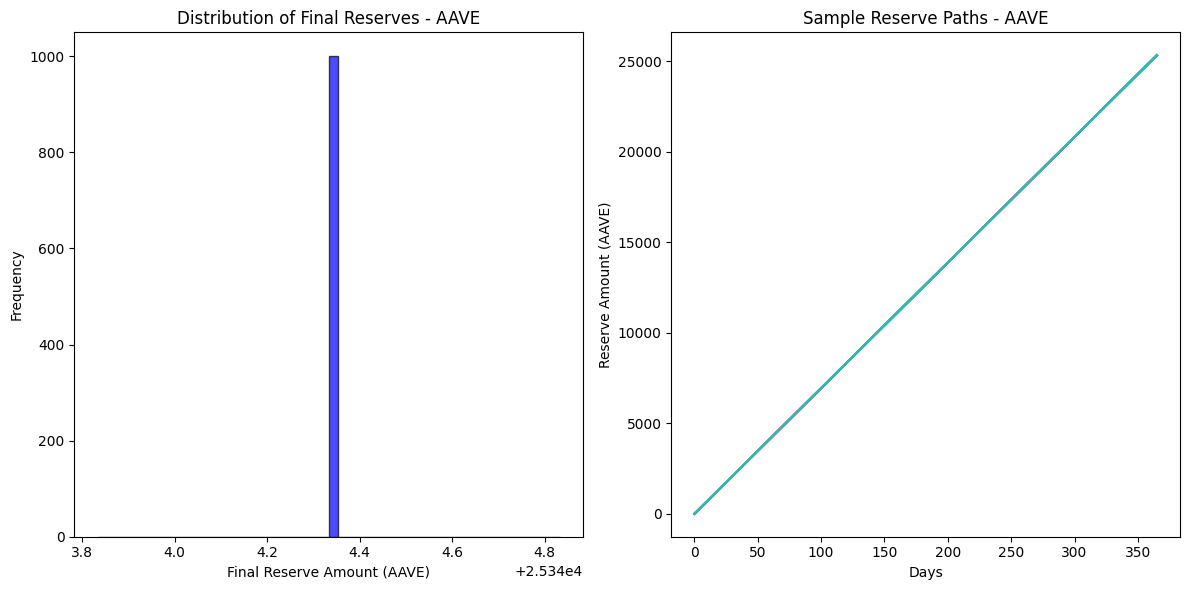

Initial reserve: 0.00 AAVE
Mean final reserve: 25344.33 AAVE
Median final reserve: 25344.33 AAVE
5th percentile reserve: 25344.33 AAVE
95th percentile reserve: 25344.33 AAVE

USD Values (based on average price of $140.28):
Initial reserve: $0.00
Mean final reserve: $3555248.91
Median final reserve: $3555248.91
5th percentile reserve: $3555248.91
95th percentile reserve: $3555248.91

Processing EURS:
Number of deposits: 1
Average deposit amount: 7.25 EURS
Average price: $1.10
Not enough variation in deposits for EURS. Skipping Monte Carlo simulation.


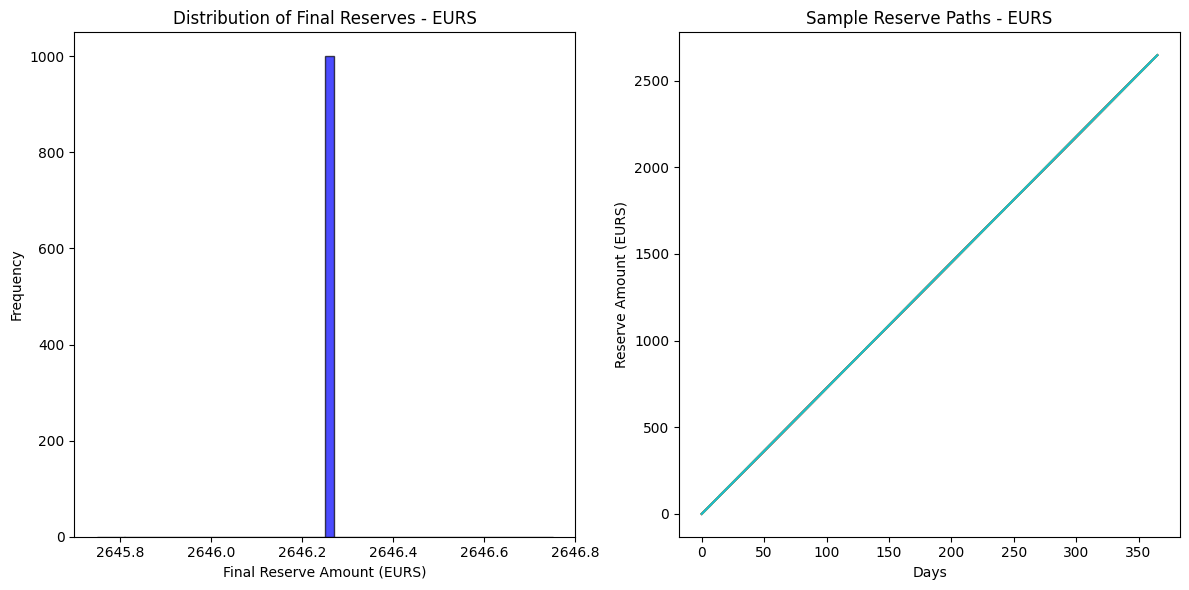

Initial reserve: 0.00 EURS
Mean final reserve: 2646.25 EURS
Median final reserve: 2646.25 EURS
5th percentile reserve: 2646.25 EURS
95th percentile reserve: 2646.25 EURS

USD Values (based on average price of $1.10):
Initial reserve: $0.00
Mean final reserve: $2923.70
Median final reserve: $2923.70
5th percentile reserve: $2923.70
95th percentile reserve: $2923.70

Processing wstETH:
Number of deposits: 5
Average deposit amount: 0.72 wstETH
Average price: $0.00


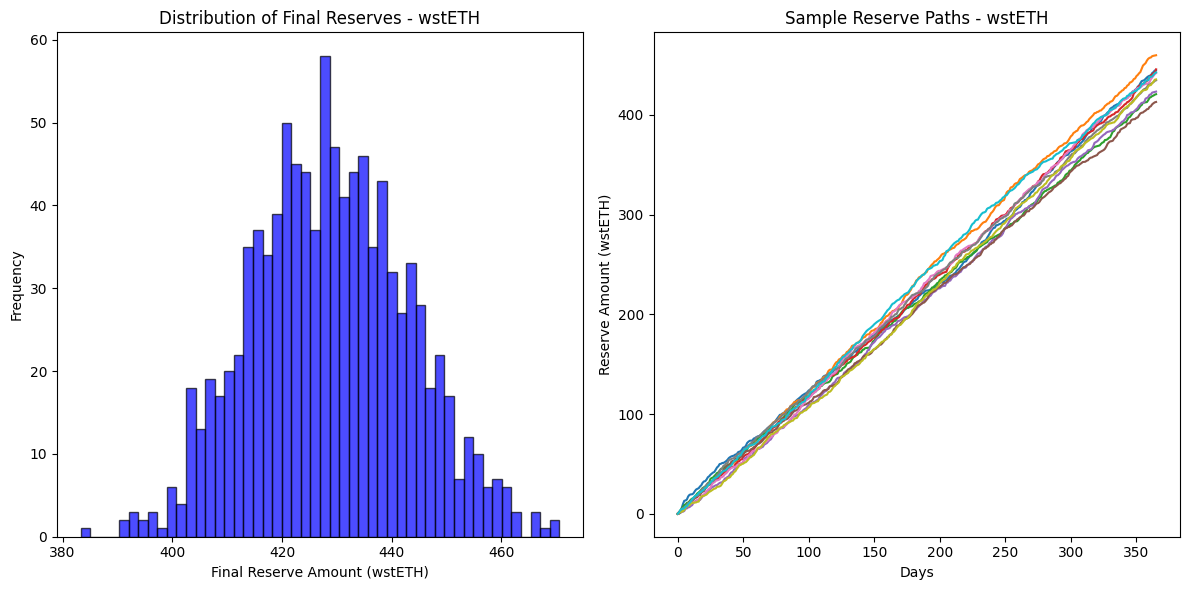

Initial reserve: 0.00 wstETH
Mean final reserve: 428.76 wstETH
Median final reserve: 428.49 wstETH
5th percentile reserve: 405.79 wstETH
95th percentile reserve: 453.05 wstETH

USD Values (based on average price of $0.00):
Initial reserve: $0.00
Mean final reserve: $0.00
Median final reserve: $0.00
5th percentile reserve: $0.00
95th percentile reserve: $0.00


In [23]:
# Run 4 : only deposits on all assets
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from scipy import stats

# Read the Supply CSV file
supply_df = pd.read_csv('ARBITRUMSupply.csv')

# Function to parse the JSON-like string
def parse_json(json_str):
    try:
        data = json.loads(json_str)
        return data.get('symbol', ''), data.get('decimals', 18)
    except:
        return '', 18

# Apply the function to create 'symbol' and 'decimals' columns
supply_df[['symbol', 'decimals']] = supply_df.iloc[:, 5].apply(parse_json).tolist()

# Get unique tokens
unique_tokens = supply_df['symbol'].unique()

def monte_carlo_simulation(supplies, prices, num_simulations, current_reserve, time_horizon):
    mean_deposit = np.mean(supplies)
    std_deposit = np.std(supplies)
    min_deposit = np.min(supplies)

    final_reserves = []
    all_paths = []

    for _ in range(num_simulations):
        simulated_reserve = current_reserve
        daily_reserves = [simulated_reserve]

        for _ in range(time_horizon):
            if std_deposit > 1e-8:  # Check if standard deviation is not too close to zero
                # Generate a random deposit using a truncated normal distribution
                daily_deposit = max(stats.truncnorm(
                    (min_deposit - mean_deposit) / std_deposit, 
                    np.inf, 
                    loc=mean_deposit, 
                    scale=std_deposit
                ).rvs(), 0)
            else:
                # If standard deviation is very small, use the mean deposit
                daily_deposit = mean_deposit

            # Update the simulated reserve
            simulated_reserve += daily_deposit
            daily_reserves.append(simulated_reserve)

        final_reserves.append(simulated_reserve)
        all_paths.append(daily_reserves)

    return final_reserves, all_paths

# Run simulation for each token
for token in unique_tokens:
    token_data = supply_df[(supply_df['symbol'] == token) & (supply_df.iloc[:, 1] == 'Supply')]
    
    if token_data.empty:
        print(f"No supply data for {token}. Skipping...")
        continue

    decimals = token_data['decimals'].iloc[0]
    supplies = token_data.iloc[:, 2].astype(float).values / (10**decimals)
    prices = token_data.iloc[:, 3].astype(float).values

    print(f"\nProcessing {token}:")
    print(f"Number of deposits: {len(supplies)}")
    print(f"Average deposit amount: {np.mean(supplies):.2f} {token}")
    print(f"Average price: ${np.mean(prices):.2f}")

    # Parameters for the simulation
    num_simulations = 1000
    current_reserve = 0  # Set current reserve to total historical deposits
    time_horizon = 365  # 1 year

    if len(supplies) < 2 or np.std(supplies) < 1e-8:
        print(f"Not enough variation in deposits for {token}. Skipping Monte Carlo simulation.")

    # Run the simulation
    final_reserves, all_paths = monte_carlo_simulation(
        supplies, prices, num_simulations, current_reserve, time_horizon
    )

    # Plotting
    plt.figure(figsize=(12, 6))

    # Plot histogram of final reserves
    plt.subplot(1, 2, 1)
    plt.hist(final_reserves, bins=50, color='blue', edgecolor='black', alpha=0.7)
    plt.title(f"Distribution of Final Reserves - {token}")
    plt.xlabel(f"Final Reserve Amount ({token})")
    plt.ylabel("Frequency")

    # Plot some sample paths
    plt.subplot(1, 2, 2)
    for i in range(min(10, num_simulations)):  # Plot up to 10 sample paths
        plt.plot(all_paths[i])
    plt.title(f"Sample Reserve Paths - {token}")
    plt.xlabel("Days")
    plt.ylabel(f"Reserve Amount ({token})")

    plt.tight_layout()
    plt.show()

    # Print statistics
    print(f"Initial reserve: {current_reserve:.2f} {token}")
    print(f"Mean final reserve: {np.mean(final_reserves):.2f} {token}")
    print(f"Median final reserve: {np.median(final_reserves):.2f} {token}")
    print(f"5th percentile reserve: {np.percentile(final_reserves, 5):.2f} {token}")
    print(f"95th percentile reserve: {np.percentile(final_reserves, 95):.2f} {token}")

    # Calculate USD values
    avg_price = np.mean(prices)
    print(f"\nUSD Values (based on average price of ${avg_price:.2f}):")
    print(f"Initial reserve: ${current_reserve * avg_price:.2f}")
    print(f"Mean final reserve: ${np.mean(final_reserves) * avg_price:.2f}")
    print(f"Median final reserve: ${np.median(final_reserves) * avg_price:.2f}")
    print(f"5th percentile reserve: ${np.percentile(final_reserves, 5) * avg_price:.2f}")
    print(f"95th percentile reserve: ${np.percentile(final_reserves, 95) * avg_price:.2f}")